In [18]:
from googleapiclient import discovery
import json
PERSPECTIVE_API_KEY="insert-your-API-key-here"
client = discovery.build(
  "commentanalyzer",
  "v1alpha1",
  developerKey=PERSPECTIVE_API_KEY,
  discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
  static_discovery=False,
)


{
  "attributeScores": {
    "TOXICITY": {
      "spanScores": [
        {
          "begin": 0,
          "end": 30,
          "score": {
            "value": 0.02543884,
            "type": "PROBABILITY"
          }
        }
      ],
      "summaryScore": {
        "value": 0.02543884,
        "type": "PROBABILITY"
      }
    }
  },
  "languages": [
    "en"
  ],
  "detectedLanguages": [
    "en"
  ]
}


In [6]:
import pandas
data_frame=pandas.read_csv("Sample_labeled_data.csv")
data_frame

,Unnamed: 0,id,comment_text,toxic
0,5,0001ea8717f6de06,Thank you for understanding I think very highl...,no
1,7,000247e83dcc1211,Dear god this site is horrible,no
2,11,0002f87b16116a7f,Somebody will invariably try to add Religion ...,no
3,13,0003e1cccfd5a40a,It says it right there that it IS a type The...,no
4,14,00059ace3e3e9a53,Before adding a new product to the list mak...,no
...,...,...,...,...
55247,153147,fff83b80284d8440,Consensus for ruining Wikipedia I think that c...,no
55248,153149,fff8f521a7dbcd47,shut down the mexican border withought looking...,no
55249,153150,fff8f64043129fa2,Jerome I see you never got around to this… I’m...,no
55250,153151,fff9d70fe0722906,Lucky bastard httpwikimediafoundationorgwikiP...,no


In [7]:
full_comments_list=data_frame["comment_text"]
import langdetect
langdetect.DetectorFactory.seed=0
index=0
comments_to_translate=[]
for full_comment in full_comments_list:
    try:
        langdetect.detect(full_comment)
        if langdetect.detect(full_comment)!="en":
            comments_to_translate.append(full_comment)
    except: 
        break
    index+=1
comments_to_translate

['일이삼사오육칠팔구하고십이요 에헤헤 으헤 으헤 으허허',
 'REDIRECT TalkMi Vida Eres Tú',
 'Puwersa ng Masa',
 'aapn bhtla aanand jhala',
 'Redirects  トレイン・トレイン トレイン トレイン トレイントレイン トレイントレイン トレイントレイン トレイントレイン トレイン トレイン トレィン☆トレィン Torein・Torein Torein Torein ToreinTorein ToreinTorein ToreinTorein Torein Torein Torein☆Torein Train・Train Train☆Train トレイン—トレイン Torein—Torein Train—Train トレイン–トレイン Torein–Torein Train–Train  should redirect here',
 'السلام عليكم و رحمة الله و بركاته الا الجميع  تفضلوا جميعا',
 ' hrthrtdghrsdtghtrsdhtrhdgthjrtgh   fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffhngviudfhgoiuerhgukfhkjgeruighervyfdohgobvijgfjgojfdhgjofhglkfhboerhgbdhoifdtyklerbhlkjhbdjgbojtgofgjrfjhlrkhilebotrjbh9jtrohibjrtlhujtyjunmoytijoryjhigfjhgfjnifgjgfhkljtgilhjfdojgfdojgfkjngfdlkjgnklfgikfvihgifbfhbgkufbdsukfgglkdhvureuhgiurhgh4irtgyrehgui4t7iryggoifhgo54oerygtjeiygut8gopfe8gig89fjhg9r8tyr8hygb7hruegfigust8g0r0retugrijtrir6tihviurhgnviurwtkcnguiergvknfgioerpjgklfupgrojgoirutkdhglrehglj

In [8]:
import translate
translated_comments=[]
for comment in comments_to_translate:
    translated_comment=translate.Translator(from_lang="autodetect",to_lang="en").translate(comment)
    translated_comments.append(translated_comment)
translated_comments

['Thirty-seven, eighty-seven, ehhhhhhhhh',
 "REDIRECT TalkMi Vida It's You",
 'Mass Force',
 'PLEASE SELECT TWO DISTINCT LANGUAGES',
 'Redirects Train Train Train Train Train Train Train Train Train Train Train☆ Train Torein Torein Torein Torein Torein Torein Torein☆ Torein Torein Torein Torein☆ Train Train Train Train Train Torein-Torein Train-Train Train-Train Train-Train Train-Train Train-Train Train-Torein-Train Train-Torein-Train Train-Torein-Torein-Train-Train-Train-Train-Train-Train-Train-Train-Train-Train-Torein-Torein-Train-Train-Train-Train-Train-Train-Torein-Torein-Train-Train-Train-Train-Torein-Train-Torein-Torein-Train-Train-Torein-Train-Torein-Train-Torein-Torein-Torein-Torein-Torein-Train-Train-Train-Torein-Torein-Train-Torein-Train-Torein-Torein-Torein-Torein-Torein-Train-Torein-Train-Train-Train-Torein-Train-Train-Train-Train-Train-Train-Train-Torein-Train-Train-Train-Train-Train-Train-Train-T',
 'Peace, mercy and blessings of God be upon you all.',
 'QUERY LENGTH LIMI

In [9]:
full_comments_list.replace(comments_to_translate,translated_comments,inplace=True)

In [20]:
import numpy
threshold_comments=data_frame.loc[data_frame["toxic"]=="yes"]["comment_text"][:10]
perspective_scores=[]
for comment in threshold_comments:
    try:
        analyze_request = {'comment': { 'text': comment},'requestedAttributes': {'TOXICITY': {}}}
        scores_list=[]
        response = client.comments().analyze(body=analyze_request).execute()
        response=str(response)
        score=response.split("'value': ")[1]
        score=score.split(",")[0]
        score=float(score)
        perspective_scores.append(score)
    except:
        perspective_scores.append(numpy.nan)
threshold=numpy.average(perspective_scores)

In [24]:
example_dataset=[]
for comment in data_frame.loc[data_frame["toxic"]=="yes"]["comment_text"][11:20]:
    example_dataset.append(comment)
for comment in data_frame.loc[data_frame["toxic"]=="no"]["comment_text"][:10]:
    example_dataset.append(comment)
example_dataset

['what the hell are you doing',
 'Being drunk made Gibson say what he really believes The little freak is a Nazi like his father and I hope he dies of lung cancer Soon',
 'Hey shithead stop vandilizing articles',
 'where I feel like a man instead of an idiot',
 'The true truth is that only my balls have official status in the Principality of Monaco Stupid  Warm musky regards  His Most Serene Highness Prince Scruffy Musky Coinpurse IV',
 'PLEASE SELECT TWO DISTINCT LANGUAGES',
 'no hes not he have his own show whihc is a cheap copy of ragu romeo show and hes only popular because of stupid people who auditions and watch this gutter show',
 'Karl Tearle is a mop haired twat',
 'GIVE BLOWJOBS TO HOT WOMEN FROM ALDERLEY EDGE CHESHIRE',
 'Thank you for understanding I think very highly of you and would not revert without discussion',
 'Dear god this site is horrible',
 ' Somebody will invariably try to add Religion  Really  You mean the way people have invariably kept adding Religion to the 

Hypothesis: Toxic comments tend to be longer than non-toxic comments.

In [25]:
perspective_scores=[]
for comment in example_dataset:
    try:
        analyze_request = {'comment': { 'text': comment},'requestedAttributes': {'TOXICITY': {}}}
        scores_list=[]
        response = client.comments().analyze(body=analyze_request).execute()
        response=str(response)
        score=response.split("'value': ")[1]
        score=score.split(",")[0]
        score=float(score)
        perspective_scores.append(score)
    except:
        perspective_scores.append(numpy.nan)
toxic_results=[]
for score in perspective_scores:
    if score>threshold:
        toxic_results.append("Yes")
    else:
        toxic_results.append("No")
comment_lens=[]
for comment in example_dataset:
    comment_lens.append(len(comment))
results_dataframe=pandas.DataFrame.from_dict({"Comment Text":example_dataset,"Toxic":toxic_results,"Comment Length":comment_lens})

In [26]:
results_dataframe

,Comment Text,Toxic,Comment Length
0,what the hell are you doing,No,27
1,Being drunk made Gibson say what he really bel...,Yes,133
2,Hey shithead stop vandilizing articles,Yes,38
3,where I feel like a man instead of an idiot,Yes,43
4,The true truth is that only my balls have offi...,No,174
5,PLEASE SELECT TWO DISTINCT LANGUAGES,No,36
6,no hes not he have his own show whihc is a che...,Yes,159
7,Karl Tearle is a mop haired twat,Yes,32
8,GIVE BLOWJOBS TO HOT WOMEN FROM ALDERLEY EDGE ...,Yes,54
9,Thank you for understanding I think very highl...,No,94


<AxesSubplot:xlabel='Toxic', ylabel='Comment Length'>

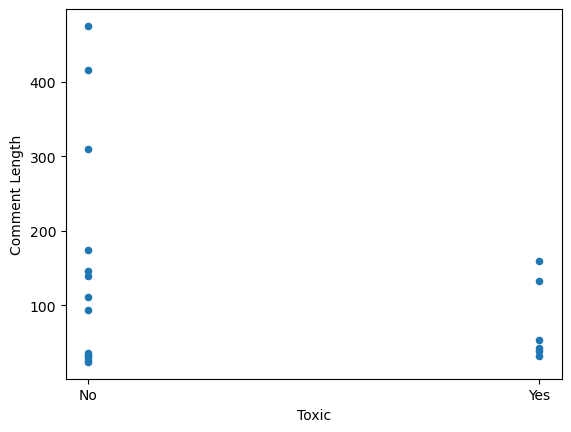

In [28]:
results_dataframe.plot.scatter(x="Toxic",y="Comment Length")

Results: While most comments seem to be less than 200 words, toxic comments in general seem to be shorter than non-toxic comments

Conclusions: I do think bias is bound to exist in this dataset, partly because the low volume of comments analyzed, but also because the comments analyzed were mostly in english. A lot of translation libraries could not translate some comments to english properly (usually due to the romanization of languages), meaning those comments were ultimately unfit to be analyzed, and therefore excluded. Additionally, before translation, most ocmments in the dataset were in english anyways.

I do think it makes sense the non-toxic comments tend to be longer, as toxic comments tend to have a lot of profanity and are usually shorter, as there are only so many profane words one can write. Another reason this would hold true is logner comments may be contributing to discussions on the articles they are comemnted on, explaining reasoning and logic.